In [3]:
import idx2numpy
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
# File paths
train_images_path = 'MNIST original/train-images.idx3-ubyte'
train_labels_path = 'MNIST original/train-labels.idx1-ubyte'
test_images_path = 'MNIST original/t10k-images.idx3-ubyte'
test_labels_path = 'MNIST original/t10k-labels.idx1-ubyte'

# Load the datasets
train_images = idx2numpy.convert_from_file(train_images_path)
train_labels = idx2numpy.convert_from_file(train_labels_path)
test_images = idx2numpy.convert_from_file(test_images_path)
test_labels = idx2numpy.convert_from_file(test_labels_path)

# Inspect data shapes, types and ranges
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)
print("Data type:", train_images.dtype)
print("Pixel value range:", train_images.min(), train_images.max())

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Data type: uint8
Pixel value range: 0 255


In [5]:
# Normalize the images by scaling pixel values to range [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


In [6]:
# Reshape the data if necessary (flattening the 28x28 images to 784-length vectors)
train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)

In [7]:
# Split the dataset into training and testing sets (already split, but combining for example)
X = np.concatenate((train_images, test_images))
y = np.concatenate((train_labels, test_labels))

# Splitting the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [8]:
print("After split, train images shape:", X_train.shape)
print("After split, test images shape:", X_test.shape)


After split, train images shape: (56000, 784)
After split, test images shape: (14000, 784)


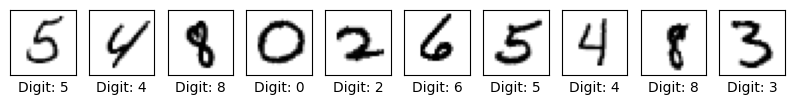

Displayed sample images from the dataset.


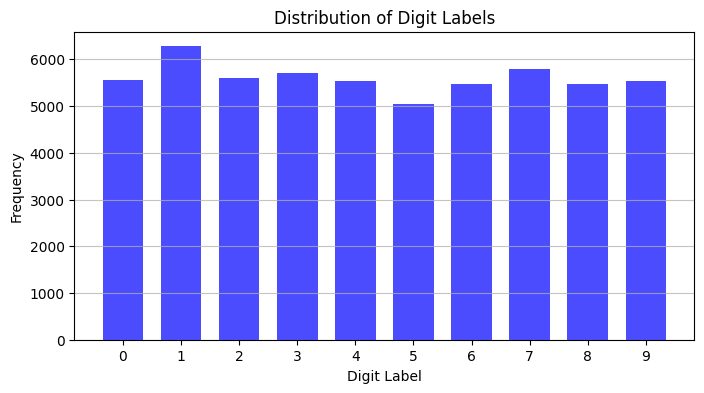

Displayed distribution of digit labels.


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# Display sample images from the dataset
images = X_train.reshape(-1, 28, 28)  # Reshape images to 28x28 if they are flattened
plt.figure(figsize=(10, 10))
for i in range(10):  # Display 10 images
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Digit: {y_train[i]}')
plt.show()
print("Displayed sample images from the dataset.")

# Analyze the distribution of labels with a histogram
plt.figure(figsize=(8, 4))
plt.hist(y_train, bins=np.arange(-0.5, 10, 1), rwidth=0.7, color='blue', alpha=0.7)
plt.title('Distribution of Digit Labels')
plt.xlabel('Digit Label')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 10))
plt.grid(axis='y', alpha=0.75)
plt.show()
print("Displayed distribution of digit labels.")

/var/folders/ly/lcy60wcx05s49bytn6_d_jfh0000gn/T/ipykernel_11009/3317657538.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train, y=pixel_sums, palette="viridis")


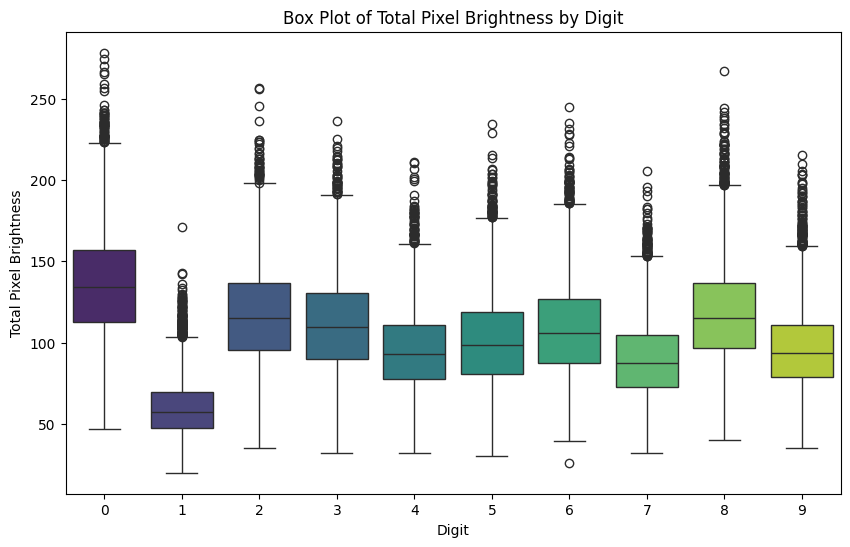

Box plot of total pixel brightness by digit displayed.


In [10]:
# Box Plot for the distribution of pixel sum by digit classes
pixel_sums = X_train.sum(axis=1)  # Sum of pixel values for each image
plt.figure(figsize=(10, 6))
sns.boxplot(x=y_train, y=pixel_sums, palette="viridis")
plt.title('Box Plot of Total Pixel Brightness by Digit')
plt.xlabel('Digit')
plt.ylabel('Total Pixel Brightness')
plt.show()

print("Box plot of total pixel brightness by digit displayed.")

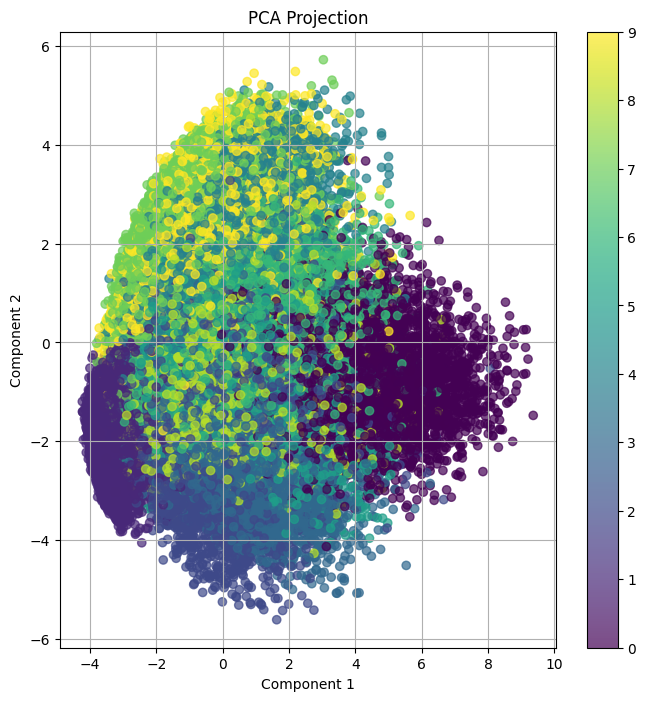

PCA projection displayed.


In [11]:
# Visualize data using PCA
pca = PCA(n_components=2)
projections = pca.fit_transform(X_train)
plt.figure(figsize=(8, 8))
scatter = plt.scatter(projections[:, 0], projections[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('PCA Projection')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

print("PCA projection displayed.")


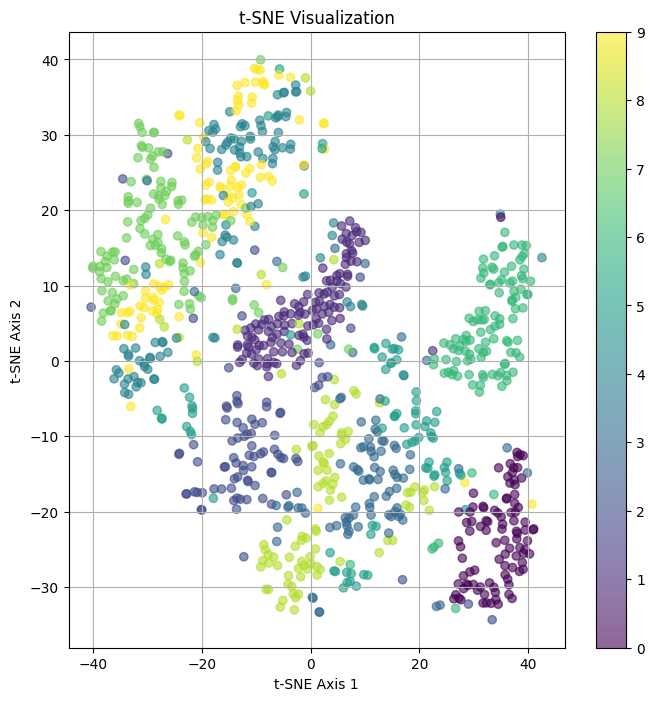

t-SNE visualization displayed.


In [12]:
# Visualize data using t-SNE
tsne = TSNE(n_components=2, random_state=42)
subset_indices = np.random.choice(X_train.shape[0], 1000, replace=False)
subset_images = X_train[subset_indices]
subset_labels = y_train[subset_indices]
tsne_results = tsne.fit_transform(subset_images)
plt.figure(figsize=(8, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=subset_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Axis 1')
plt.ylabel('t-SNE Axis 2')
plt.grid(True)
plt.show()
print("t-SNE visualization displayed.")

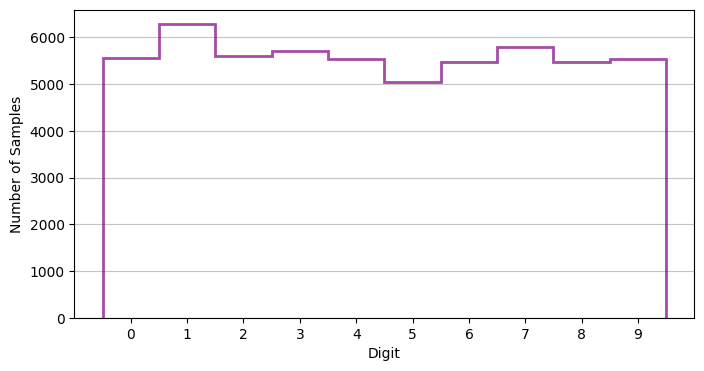

Histogram of samples per digit class displayed.


In [13]:
# Histogram of the number of samples per digit class
plt.figure(figsize=(8, 4))
plt.hist(y_train, bins=np.arange(-0.5, 10, 1), color='purple', alpha=0.7, histtype='step', linewidth=2)
plt.xlabel('Digit')
plt.ylabel('Number of Samples')
plt.xticks(np.arange(0, 10))
plt.grid(axis='y', alpha=0.75)
plt.show()
print("Histogram of samples per digit class displayed.")

In [14]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)

# Train the k-Nearest Neighbors model
knn.fit(X_train, y_train)

print("\nTrained k-Nearest Neighbors")
print("k-NN training accuracy:", accuracy_score(y_train, knn.predict(X_train)))
print("k-NN test accuracy:", accuracy_score(y_test, knn.predict(X_test)))




Trained k-Nearest Neighbors


In [31]:
svm = SVC(gamma='scale')  # 'scale' automatically sets gamma based on the data

# Train the Support Vector Machine model
svm.fit(X_train, y_train)
print("\nTrained Support Vector Machine")
print("SVM training accuracy:", accuracy_score(y_train, svm.predict(X_train)))

print("SVM test accuracy:", accuracy_score(y_test, svm.predict(X_test)))



Trained Support Vector Machine
SVM training accuracy: 0.9899464285714286
SVM test accuracy: 0.9764285714285714


In [2]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=10)
# Train the Decision Tree models
decision_tree.fit(X_train, y_train)



NameError: name 'X_train' is not defined

In [35]:
!pip3 install decision_tree

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lion_pytorch-0.1.2-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Using cached decision_tree-0.04.tar.gz (10.0 kB)
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirement